## Linear Regression - Introduction

## Imports & Settings

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

### Simple Regression

#### Generate random data

In [7]:
x = np.linspace(-5, 50, 500)
y = 50 + 2 * x + np.random.normal(0, 15, size=len(x))
data = pd.DataFrame({'X': x, 'Y': y})

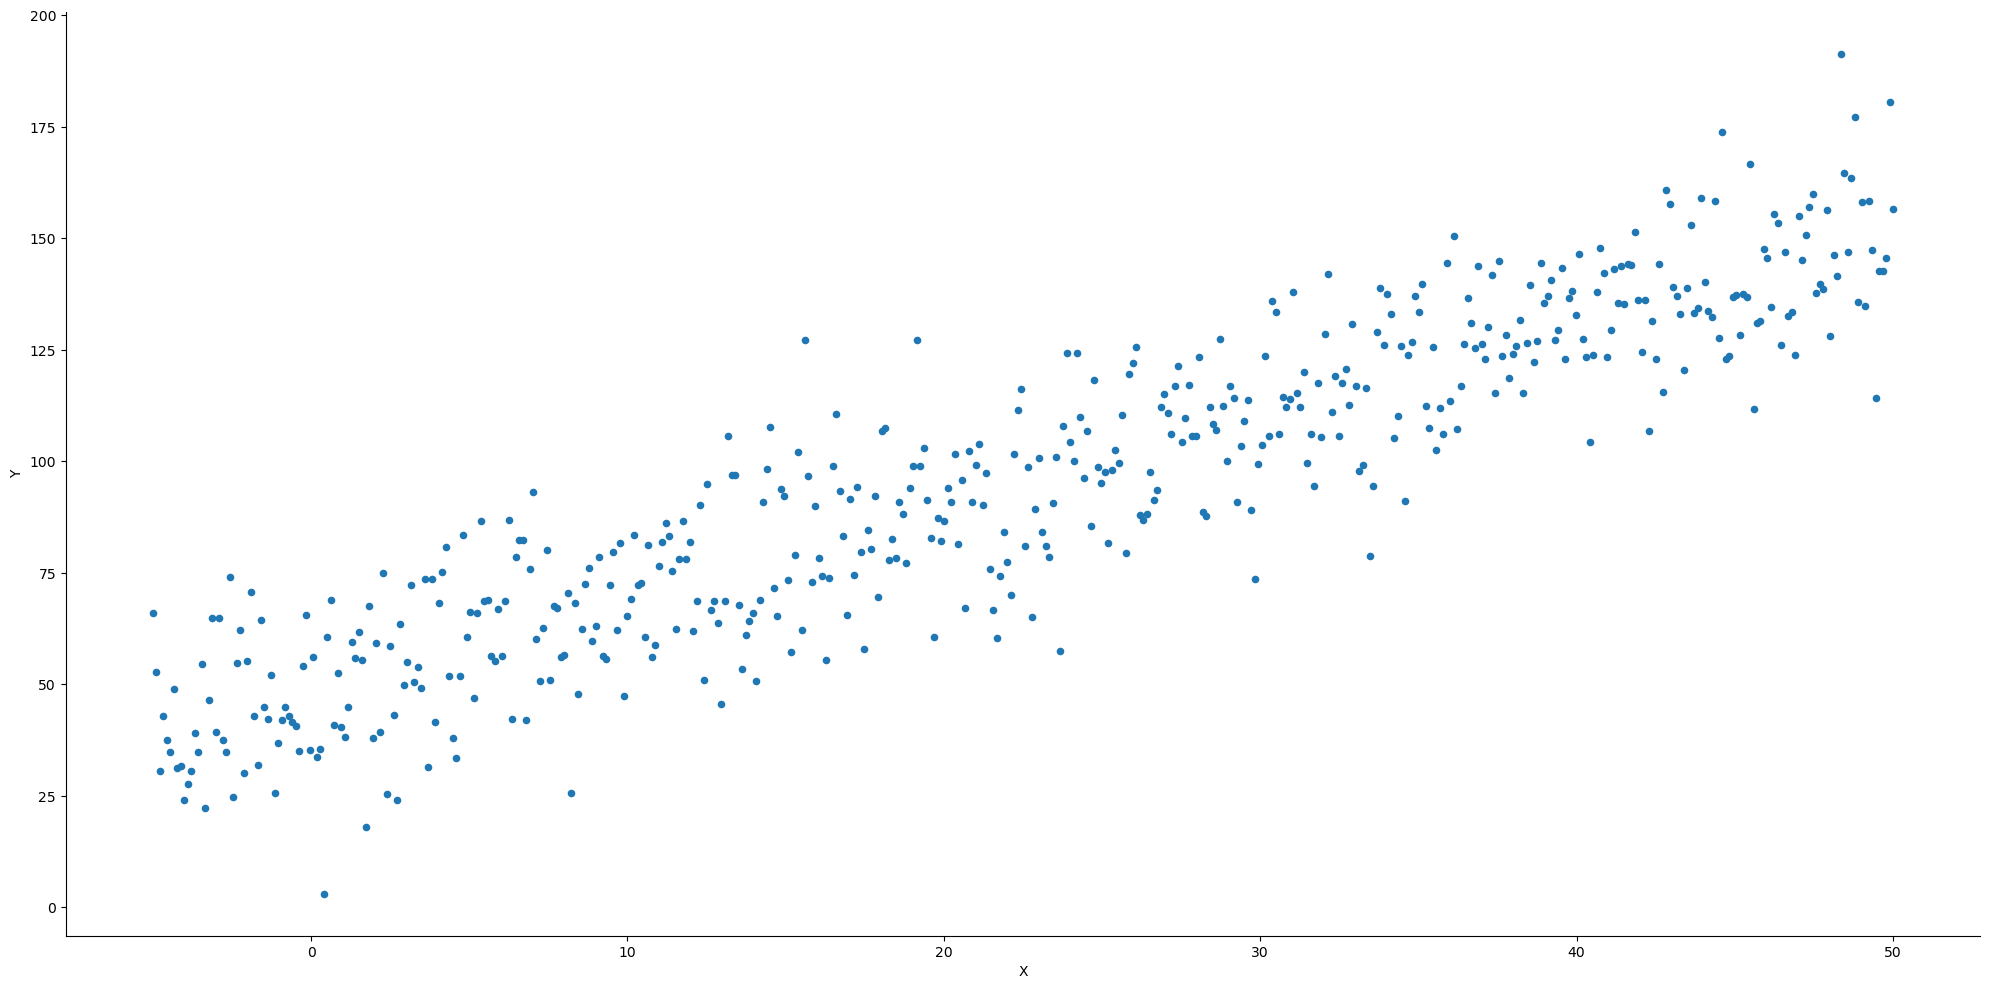

In [8]:
ax = data.plot.scatter(x='X', y='Y', figsize=(20, 10))
sns.despine()
plt.tight_layout()

Our linear model with a single independent variable on the left-hand side assumes the following form:

$$y = \beta_0 + \beta_1 X_1 + \epsilon$$

$\epsilon$ accounts for the deviations or errors that we will encounter when our data do not actually fit a straight line. When $\epsilon$ materializes, that is when we run the model of this type on actual data, the errors are called **residuals**.

#### Estimate a simple regression with statsmodels

In [9]:
X = sm.add_constant(data['X'])
model = sm.OLS(data['Y'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     2586.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):          2.61e-199
Time:                        22:52:28   Log-Likelihood:                -2044.6
No. Observations:                 500   AIC:                             4093.
Df Residuals:                     498   BIC:                             4102.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.2784      1.121     43.061      0.0

#### Verify calculation

In [10]:
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
pd.Series(beta, index=X.columns)

const    48.278371
X         2.068961
dtype: float64

#### Display model & residuals

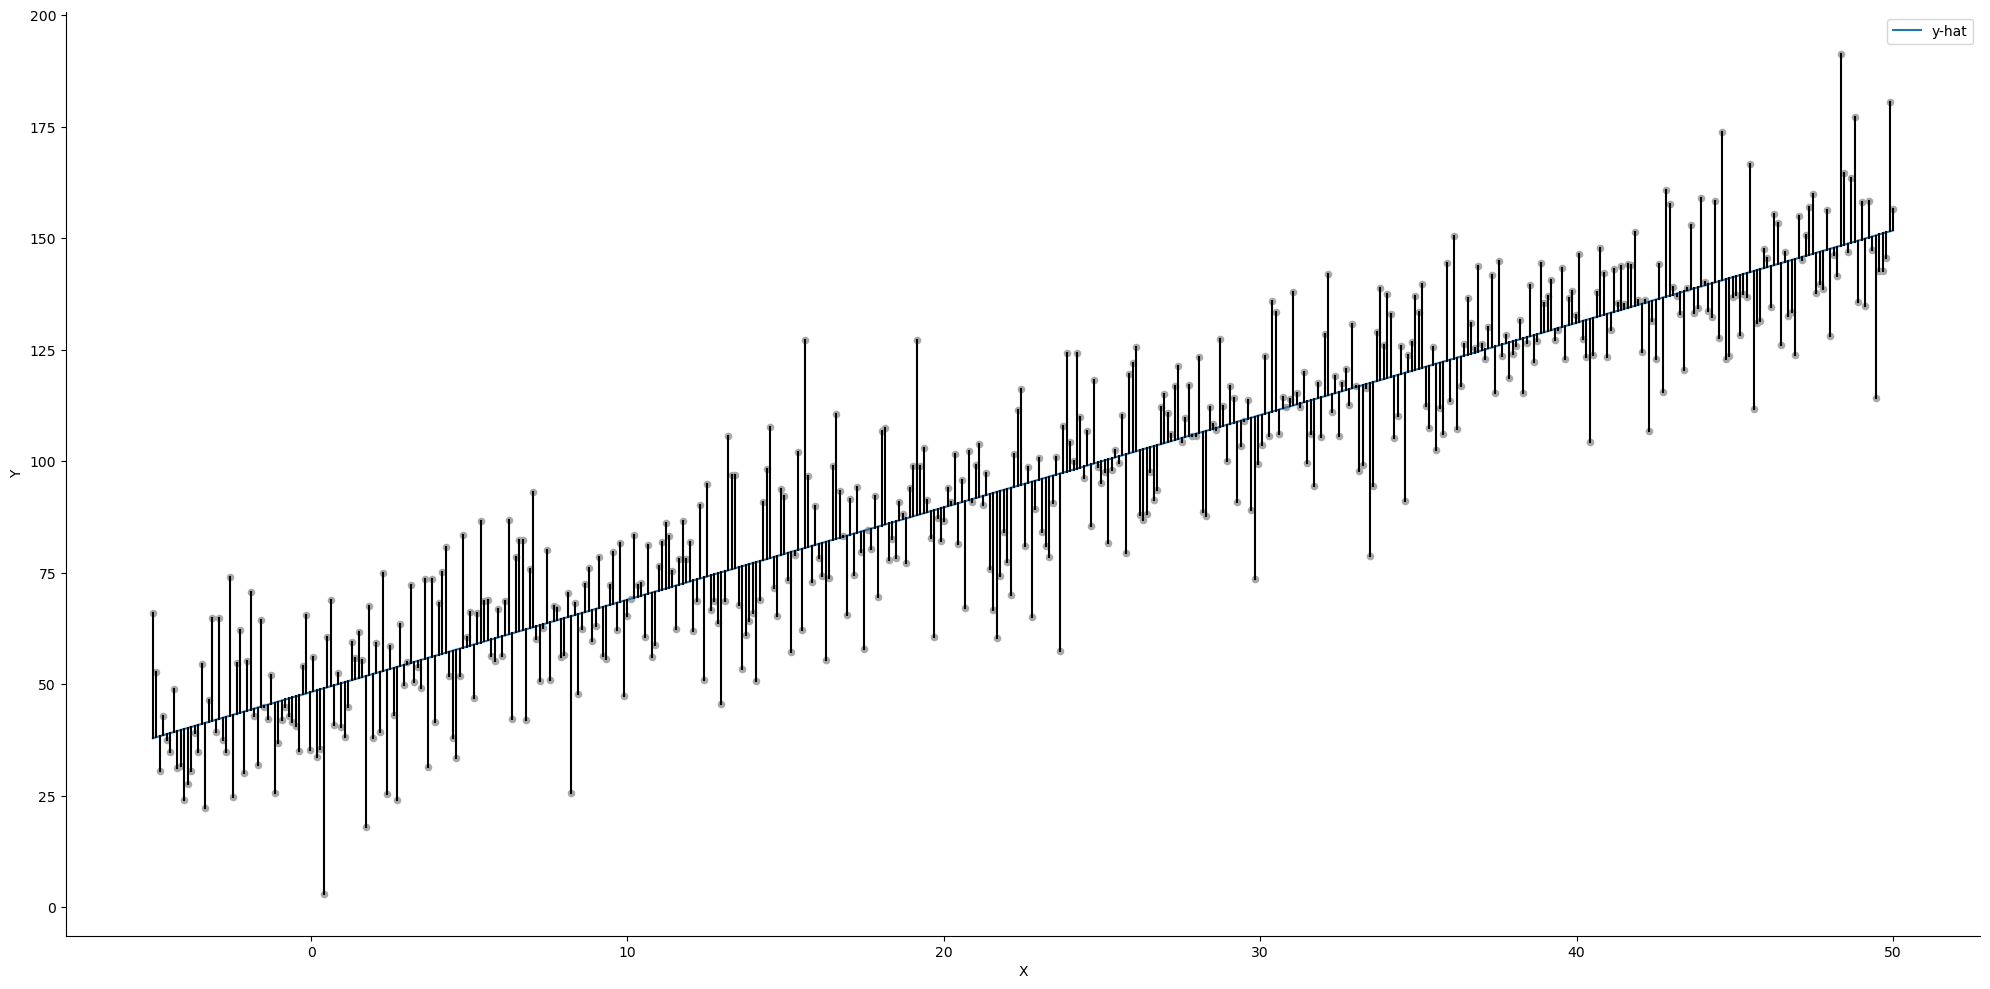

In [13]:
data['y-hat'] = model.predict()
data['residuals'] = model.resid
ax = data.plot.scatter(x='X', y='Y', c='darkgrey', figsize=(20,10))
data.plot.line(x='X', y='y-hat', ax=ax);
for _, row in data.iterrows():
    plt.plot((row.X, row.X), (row.Y, row['y-hat']), 'k-')    
sns.despine()
plt.tight_layout();

### Multiple Regression

For two independent variables, the model simply changes as follows:

$$y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon$$

#### Generate new random data

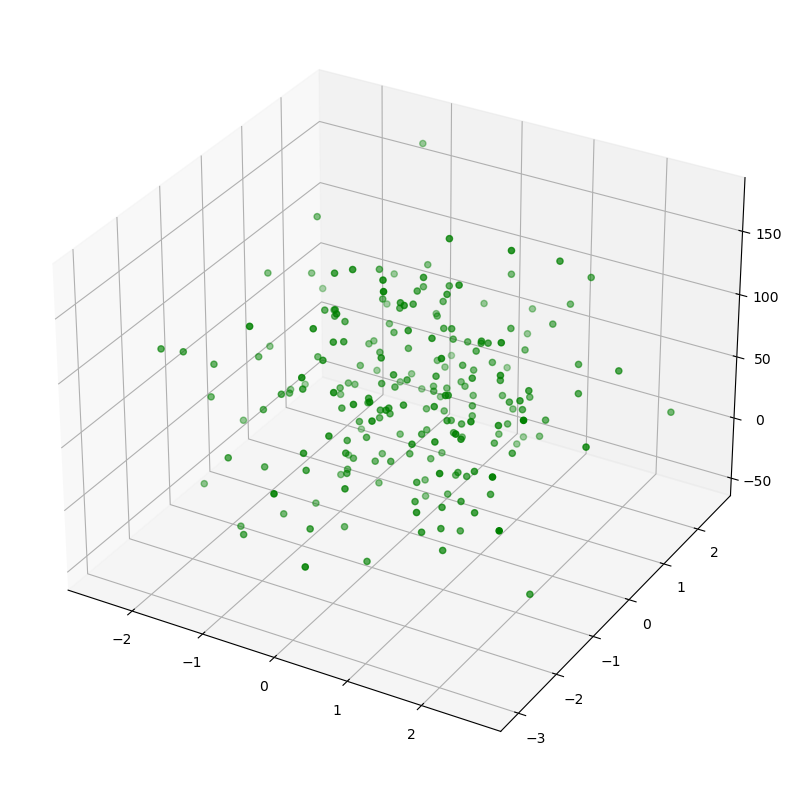

In [16]:
## Create data

size = 15
data = pd.DataFrame({'X_1': np.random.normal(size=size**2),
                     'X_2': np.random.normal(size=size**2)})
data['Y'] = 50 + data.X_1 + 3 * data.X_2 + np.random.normal(0, 50, size=size**2)

# Création d'un graphique 3D
fig = plt.figure(figsize=(20, 10))
three_dee = fig.add_subplot(111, projection='3d')
three_dee.scatter(data.X_1, data.X_2, data.Y, c='g')

# Affichage du graphique
plt.show()

In [17]:
X = data[['X_1', 'X_2']]
y = data['Y']

#### Estimate multiple regression model with statsmodels

In [19]:
X_ols = sm.add_constant(X)
model = sm.OLS(y, X_ols).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.490
Date:                Mon, 30 Sep 2024   Prob (F-statistic):              0.228
Time:                        23:00:04   Log-Likelihood:                -1185.9
No. Observations:                 225   AIC:                             2378.
Df Residuals:                     222   BIC:                             2388.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.5730      3.175     16.874      0.0

#### Verify computation

In [20]:
beta = np.linalg.inv(X_ols.T.dot(X_ols)).dot(X_ols.T.dot(y))
pd.Series(beta, index=X_ols.columns)

const    53.572986
X_1       0.101002
X_2       5.223254
dtype: float64

# Portfolio Investment using Linear Regression

For this work, we want to create an investment portfolio using Linear regression.

#### Import Essential Library

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import datetime
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [41]:
class RegressionModel:
    def __init__(self, model_type='linear', **kwargs):
        """
        Initializes the regression model. By default, it initializes with a linear regression.
        
        Args:
            model_type (str): The type of model ('linear', 'lasso', 'ridge', 'elasticnet').
            **kwargs: Other optional parameters for the model.
        """
        self.model_type = model_type  # The type of model (e.g., 'linear', 'lasso', etc.)
        self.model = None  # Initialize the model to None; it will be set later.
        self.alpha = None  # Variable to store the best alpha (regularization parameter).
        self.set_model(**kwargs)  # Call the method to set up the model.

    def set_model(self, **kwargs):
        """
        Configures the model based on the selected model type.
        """
        if self.model_type == 'linear':
            self.model = LinearRegression(**kwargs)  # Linear regression model with no regularization.
        elif self.model_type == 'lasso':
            # Lasso model (L1 regularization) with alpha set if available, otherwise default alpha = 1.0.
            self.model = Lasso(alpha=self.alpha if self.alpha else 1.0, **kwargs)
        elif self.model_type == 'ridge':
            # Ridge model (L2 regularization) with alpha set if available.
            self.model = Ridge(alpha=self.alpha if self.alpha else 1.0, **kwargs)
        elif self.model_type == 'elasticnet':
            # ElasticNet model (combination of L1 and L2 regularization).
            self.model = ElasticNet(alpha=self.alpha if self.alpha else 1.0, **kwargs)
        else:
            # If an unsupported model type is provided, raise an error.
            raise ValueError("Invalid model type. Choose 'linear', 'lasso', 'ridge', or 'elasticnet'.")

    def fit(self, X, y, alpha_range=None, scoring='r2'):
        """
        Fits the model on the provided data. For regularization models (Lasso, Ridge, ElasticNet), 
        it can search for the best alpha parameter over a given range.

        Args:
            X (array-like): The feature variables.
            y (array-like): The target variable.
            alpha_range (list, optional): Range of alpha values for regularization.
            scoring (str, optional): Metric used to evaluate model performance (default: R2).
        """
        if self.model_type in ['lasso', 'ridge', 'elasticnet'] and alpha_range is not None:
            # For regularization models, if an alpha range is provided, perform a grid search to find the best alpha.
            grid = GridSearchCV(estimator=self.model, param_grid={'alpha': alpha_range}, scoring=scoring)
            grid.fit(X, y)
            self.alpha = grid.best_params_['alpha']  # Store the best alpha value.
            # Re-initialize the model with the best alpha found.
            self.set_model()
        self.model.fit(X, y)  # Fit the model to the data.

    def predict(self, X):
        """
        Predicts target values for the given X data.

        Args:
            X (array-like): The feature data for which predictions are required.

        Returns:
            array-like: Model predictions.
        """
        return self.model.predict(X)

    def evaluate(self, X_test, y_test):
        """
        Evaluates the model on a test set by calculating various metrics.

        Args:
            X_test (array-like): The feature variables of the test set.
            y_test (array-like): The true target values of the test set.

        Returns:
            dict: A dictionary containing MSE, R2, and tracking error metrics.
        """
        predictions = self.predict(X_test)  # Make predictions on the test set.
        mse = mean_squared_error(y_test, predictions)  # Compute the Mean Squared Error.
        r2 = r2_score(y_test, predictions)  # Compute the R-squared score.
        return {'MSE': mse, 'R2': r2}

    def get_parameters(self, feature_names):
        """
        Returns the coefficients of the fitted model.

        Args:
            feature_names (list): Names of the feature variables.

        Returns:
            DataFrame: A DataFrame containing the feature names and their corresponding coefficients.
        """
        if hasattr(self.model, 'coef_'):
            # Create a data frame with the model's coefficients for each feature.
            params_df = pd.DataFrame({
                'Asset': feature_names,
                'Coefficient': self.model.coef_
            })
            # Add the intercept to the DataFrame.
            intercept_df = pd.DataFrame({
                'Asset': ['Intercept'],
                'Coefficient': [self.model.intercept_]
            })
            # Concatenate the feature coefficients and intercept into one DataFrame.
            params_df = pd.concat([params_df, intercept_df], ignore_index=True)
            return params_df
        else:
            return "Model coefficients are not available. Ensure the model is fitted."  # If no coefficients exist, return this message.


In [42]:
# Define the tickers for the S&P 500 index and its top 10 constituents
# Note: The actual top 10 can vary, this is a representative list based on recent data
DJ30 = '^DJI'
DJ30_tickers = [
    'AAPL',  # Apple
    'MSFT',  # Microsoft
    'V',     # Visa
    'JNJ',   # Johnson & Johnson
    'WMT',   # Walmart
    'PG',    # Procter & Gamble
    'JPM',   # JPMorgan Chase
    'UNH',   # UnitedHealth
    'HD',    # Home Depot
    'GS',    # Goldman Sachs
    'INTC',  # Intel
    'IBM',   # IBM
]

In [43]:
# Fetch historical data (let's say for the past 5 years)
end_date = '2023-12-31'
start_date = "2010-01-01"

# Initialize a DataFrame to store the adjusted close prices
data = pd.DataFrame()

# Fetch the data for each stock and the S&P 500 index
for ticker in DJ30_tickers + [DJ30]:
    stock_data = yf.download(ticker, start=start_date, end=end_date)['Adj Close']
    data[ticker] = stock_data

data.tail()  # Display the first few rows to verify the data fetching


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,AAPL,MSFT,V,JNJ,WMT,PG,JPM,UNH,HD,GS,INTC,IBM,^DJI
Date,,,,,,,,,,,,,
2023-12-22,192.868149,372.543945,256.957214,151.898438,51.712521,142.584457,164.497726,514.254089,342.047699,373.488342,47.365639,157.716400,37385.968750
2023-12-26,192.320221,372.623505,257.683075,152.562851,51.633293,143.232224,165.470566,513.977356,342.754181,374.430267,49.832600,158.757217,37545.328125
2023-12-27,192.419830,372.036713,257.454376,152.768051,52.118561,143.350006,166.463058,516.705200,341.988831,377.246307,50.089161,159.000397,37656.519531
2023-12-28,192.848206,373.240112,258.915955,152.992767,52.016232,143.026108,167.347473,518.790710,340.840759,379.139954,49.724052,159.282471,37710.101562
2023-12-29,191.802185,373.995972,258.866302,153.149124,52.042637,143.821091,167.150925,520.342346,340.045959,378.511993,49.585903,159.087952,37689.539062


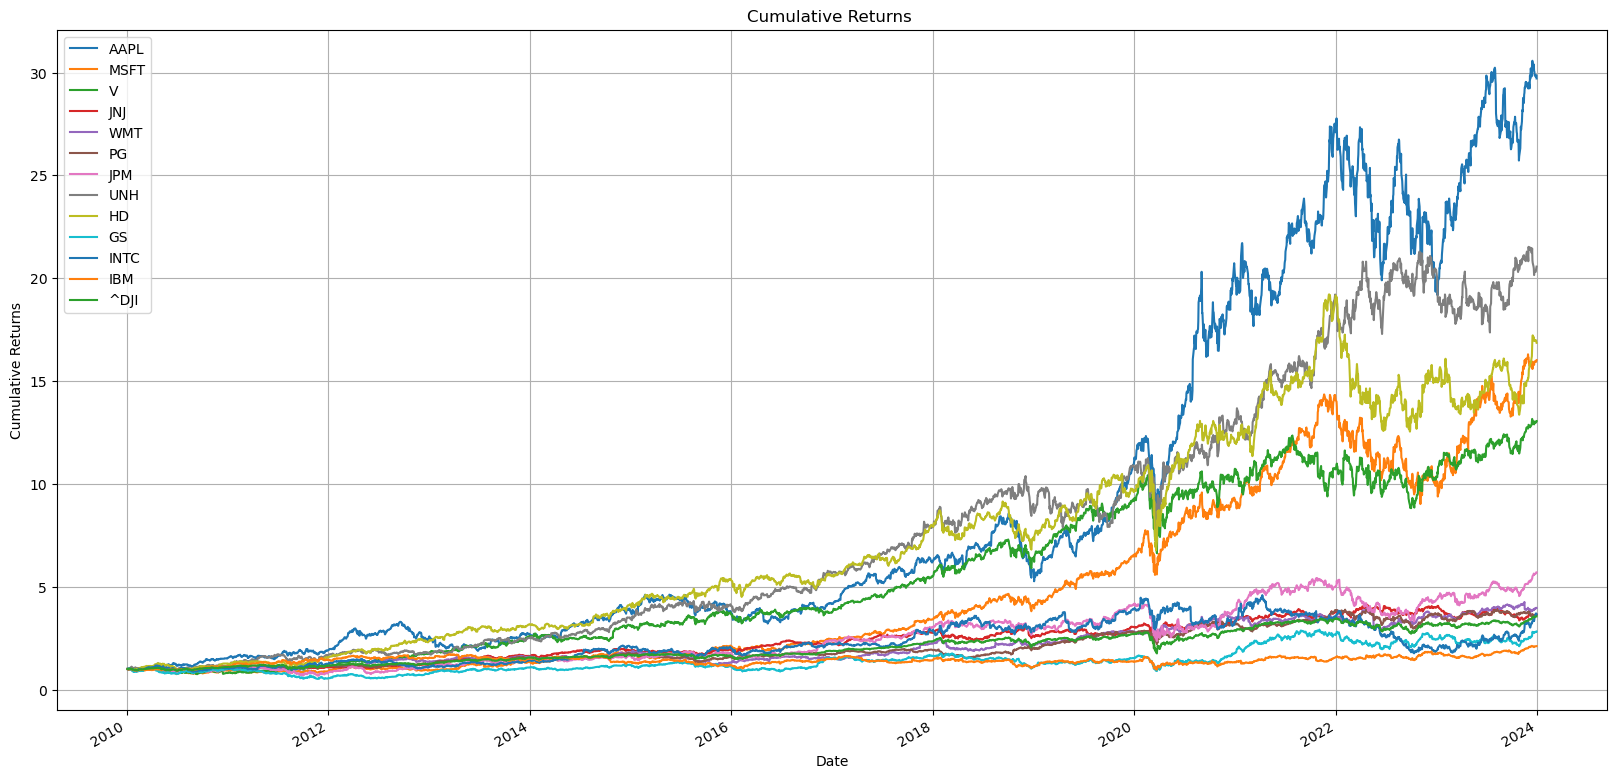

In [44]:
# Retrieve the first row (the starting point)
first_row = data.iloc[0]

# Calculate the cumulative returns
cumulative_returns = data / first_row
# We divide each day's prices by the first day's prices
cumulative_returns.plot(figsize=(20, 10))
plt.title("Cumulative Returns ")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.grid(True)
plt.show()

In [45]:
# Ensure all data is aligned and clean
data = data.dropna()
data_for_model=(data-data.shift(1))/data.shift(1)
data_for_model.head()

,AAPL,MSFT,V,JNJ,WMT,PG,JPM,UNH,HD,GS,INTC,IBM,^DJI
Date,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001729,0.000323,-0.011459,-0.011595,-0.009958,0.000327,0.019370,-0.001586,0.007325,0.017679,-0.000479,-0.012080,-0.001128
2010-01-06,-0.015906,-0.006137,-0.013428,0.008133,-0.002235,-0.004743,0.005495,0.009848,-0.003462,-0.010673,-0.003354,-0.006496,0.000157
2010-01-07,-0.001849,-0.010399,0.009306,-0.007137,0.000560,-0.005423,0.019809,0.038377,0.011813,0.019568,-0.009616,-0.003461,0.003138
2010-01-08,0.006648,0.006896,0.002767,0.003438,-0.005037,-0.001322,-0.002456,-0.009391,-0.004807,-0.018911,0.011165,0.010035,0.001068


In [46]:
# Splitting data into features and target
X = data_for_model[DJ30_tickers].dropna()
y = data_for_model[DJ30].dropna()
display(X.head(),y.head())

,AAPL,MSFT,V,JNJ,WMT,PG,JPM,UNH,HD,GS,INTC,IBM
Date,,,,,,,,,,,,
2010-01-05,0.001729,0.000323,-0.011459,-0.011595,-0.009958,0.000327,0.019370,-0.001586,0.007325,0.017679,-0.000479,-0.012080
2010-01-06,-0.015906,-0.006137,-0.013428,0.008133,-0.002235,-0.004743,0.005495,0.009848,-0.003462,-0.010673,-0.003354,-0.006496
2010-01-07,-0.001849,-0.010399,0.009306,-0.007137,0.000560,-0.005423,0.019809,0.038377,0.011813,0.019568,-0.009616,-0.003461
2010-01-08,0.006648,0.006896,0.002767,0.003438,-0.005037,-0.001322,-0.002456,-0.009391,-0.004807,-0.018911,0.011165,0.010035
2010-01-11,-0.008821,-0.012720,-0.002874,0.000156,0.016501,-0.003971,-0.003357,0.006728,-0.028295,-0.015777,0.005761,-0.010470


Date
2010-01-05   -0.001128
2010-01-06    0.000157
2010-01-07    0.003138
2010-01-08    0.001068
2010-01-11    0.004313
Name: ^DJI, dtype: float64

In [47]:
# Calculate the number of observations for 70% of the dataset
train_size = int(len(X) * 0.7)
data_train=data.iloc[:train_size]
data_test=data.iloc[train_size:]

In [48]:
# Split the data manually
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

### Linear Regression 

In [49]:
# Initialize the model
model = RegressionModel(model_type='linear')
# Fit the model
model.fit(X_train, y_train)
# Evaluate the model
evaluation_results = model.evaluate(X_test, y_test)
# Display the results
print(evaluation_results)
# Display parameter df
parameters_df = model.get_parameters(feature_names=X_train.columns)
parameters_df

{'MSE': 1.2821796130979876e-05, 'R2': 0.9334409461383031}


,Asset,Coefficient
0,AAPL,0.045434
1,MSFT,0.054196
2,V,0.065139
3,JNJ,0.137433
4,WMT,0.054122
5,PG,0.093602
6,JPM,0.105294
7,UNH,0.063218
8,HD,0.098590
9,GS,0.063295


In [50]:
parameters_df['Coefficient'].sum()

0.9586893868659941

In [51]:
parameters_df['weight']=parameters_df['Coefficient']/parameters_df['Coefficient'].sum()

In [52]:
parameters_df

,Asset,Coefficient,weight
0,AAPL,0.045434,0.047392
1,MSFT,0.054196,0.056531
2,V,0.065139,0.067946
3,JNJ,0.137433,0.143355
4,WMT,0.054122,0.056454
5,PG,0.093602,0.097635
6,JPM,0.105294,0.109831
7,UNH,0.063218,0.065942
8,HD,0.098590,0.102838
9,GS,0.063295,0.066022


In [53]:
np.round(parameters_df['weight'].sum())

1.0

### Lasso, Rodge and Elasticnet

In [54]:
lasso_model = RegressionModel(model_type='lasso')
ridge_model = RegressionModel(model_type='ridge')
elasticnet_model = RegressionModel(model_type='elasticnet')

# Plage de valeurs alpha pour la recherche de grille
alpha_range = np.logspace(-4, 4, 50)

# Entraînement des modèles
lasso_model.fit(X_train, y_train, alpha_range=alpha_range)
ridge_model.fit(X_train, y_train, alpha_range=alpha_range)
elasticnet_model.fit(X_train, y_train, alpha_range=alpha_range)

# Évaluation des modèles sur les données de test
evaluation_lasso = lasso_model.evaluate(X_test, y_test)
evaluation_ridge = ridge_model.evaluate(X_test, y_test)
evaluation_elasticnet = elasticnet_model.evaluate(X_test, y_test)

# Affichage des résultats d'évaluation
print("Évaluation Lasso:", evaluation_lasso)
print("Évaluation Ridge:", evaluation_ridge)
print("Évaluation ElasticNet:", evaluation_elasticnet)

# Obtention des paramètres pour chaque modèle
parameters_lasso = lasso_model.get_parameters(X_train.columns)
parameters_ridge = ridge_model.get_parameters(X_train.columns)
parameters_elasticnet = elasticnet_model.get_parameters(X_train.columns)

# Affichage des paramètres de chaque modèle
print("Paramètres Lasso:\n", parameters_lasso)
print("Paramètres Ridge:\n", parameters_ridge)
print("Paramètres ElasticNet:\n", parameters_elasticnet)



Évaluation Lasso: {'MSE': 0.0001793011750867753, 'R2': 0.06923207574396317}
Évaluation Ridge: {'MSE': 1.261692946305934e-05, 'R2': 0.9345044267493887}
Évaluation ElasticNet: {'MSE': 8.814876945937455e-05, 'R2': 0.5424121055775644}
Paramètres Lasso:
         Asset  Coefficient
0        AAPL     0.000000
1        MSFT     0.000000
2           V     0.000000
3         JNJ     0.000000
4         WMT     0.000000
5          PG     0.000000
6         JPM     0.028867
7         UNH     0.000000
8          HD     0.000000
9          GS     0.000000
10       INTC     0.000000
11        IBM     0.000000
12  Intercept     0.000402
Paramètres Ridge:
         Asset  Coefficient
0        AAPL     0.046796
1        MSFT     0.057302
2           V     0.066994
3         JNJ     0.118248
4         WMT     0.055665
5          PG     0.086679
6         JPM     0.101703
7         UNH     0.065040
8          HD     0.093973
9          GS     0.067456
10       INTC     0.056559
11        IBM     0.115567
12

In [55]:
parameters_lasso['weight']=parameters_lasso['Coefficient']/parameters_lasso['Coefficient'].sum()
parameters_ridge['weight']=parameters_ridge['Coefficient']/parameters_ridge['Coefficient'].sum()
parameters_elasticnet['weight']=parameters_elasticnet['Coefficient']/parameters_elasticnet['Coefficient'].sum()

In [56]:
rep=parameters_df.iloc[:-1]
rep_lasso=parameters_lasso.iloc[:-1]
rep_ridge=parameters_ridge.iloc[:-1]
rep_elas=parameters_elasticnet.iloc[:-1]

# Calcul du Benchmark
Ben = data_test['^DJI'] / data_test['^DJI'].iloc[0]

# Calcul des rendements quotidiens des actifs dans le portefeuille
daily_returns = data_test.drop(columns=['^DJI']).pct_change().dropna()

# Poids des actifs dans le portefeuille
weights = list(rep['weight'])
weights_lasso = list(rep_lasso['weight'])
weights_ridge = list(rep_ridge['weight'])
weights_Elast = list(rep_elas['weight'])

# Calcul des rendements pondérés du portefeuille
portfolio_r = (daily_returns * weights).sum(axis=1)
portfolio_r_lasso = (daily_returns * weights_lasso).sum(axis=1)
portfolio_r_ridge = (daily_returns * weights_ridge).sum(axis=1)
portfolio_r_elast = (daily_returns * weights_Elast).sum(axis=1)

# Calcul des rendements cumulés du portefeuille
cumulative_r = (1 + portfolio_r).cumprod()
cumulative_r_lasso = (1 + portfolio_r_lasso).cumprod()
cumulative_r_ridge = (1 + portfolio_r_ridge).cumprod()
cumulative_r_elast = (1 + portfolio_r_elast).cumprod()

# Création du DataFrame
results_df = pd.DataFrame({
    'DJI': Ben,
    'Portfolio Cumulative Returns OLS': cumulative_r,
    'Portfolio Cumulative Returns Lasso': cumulative_r_lasso,
    'Portfolio Cumulative Returns Ridge': cumulative_r_ridge,
    'Portfolio Cumulative Returns Elasticnet': cumulative_r_elast
})

results_df

,DJI,Portfolio Cumulative Returns OLS,Portfolio Cumulative Returns Lasso,Portfolio Cumulative Returns Ridge,Portfolio Cumulative Returns Elasticnet
Date,,,,,
2019-10-17,1.000000,NaN,NaN,NaN,NaN
2019-10-18,0.990539,0.990371,1.001721,0.991206,0.996305
2019-10-21,0.992665,0.995878,1.026224,0.996923,1.011515
2019-10-22,0.991202,1.000709,1.036382,1.001293,1.010100
2019-10-23,0.992898,1.002600,1.039085,1.003139,1.013752
...,...,...,...,...,...
2023-12-22,1.383340,1.775592,1.565061,1.795416,1.883528
2023-12-26,1.389236,1.785940,1.574190,1.806077,1.901206
2023-12-27,1.393350,1.790302,1.583502,1.810630,1.909090


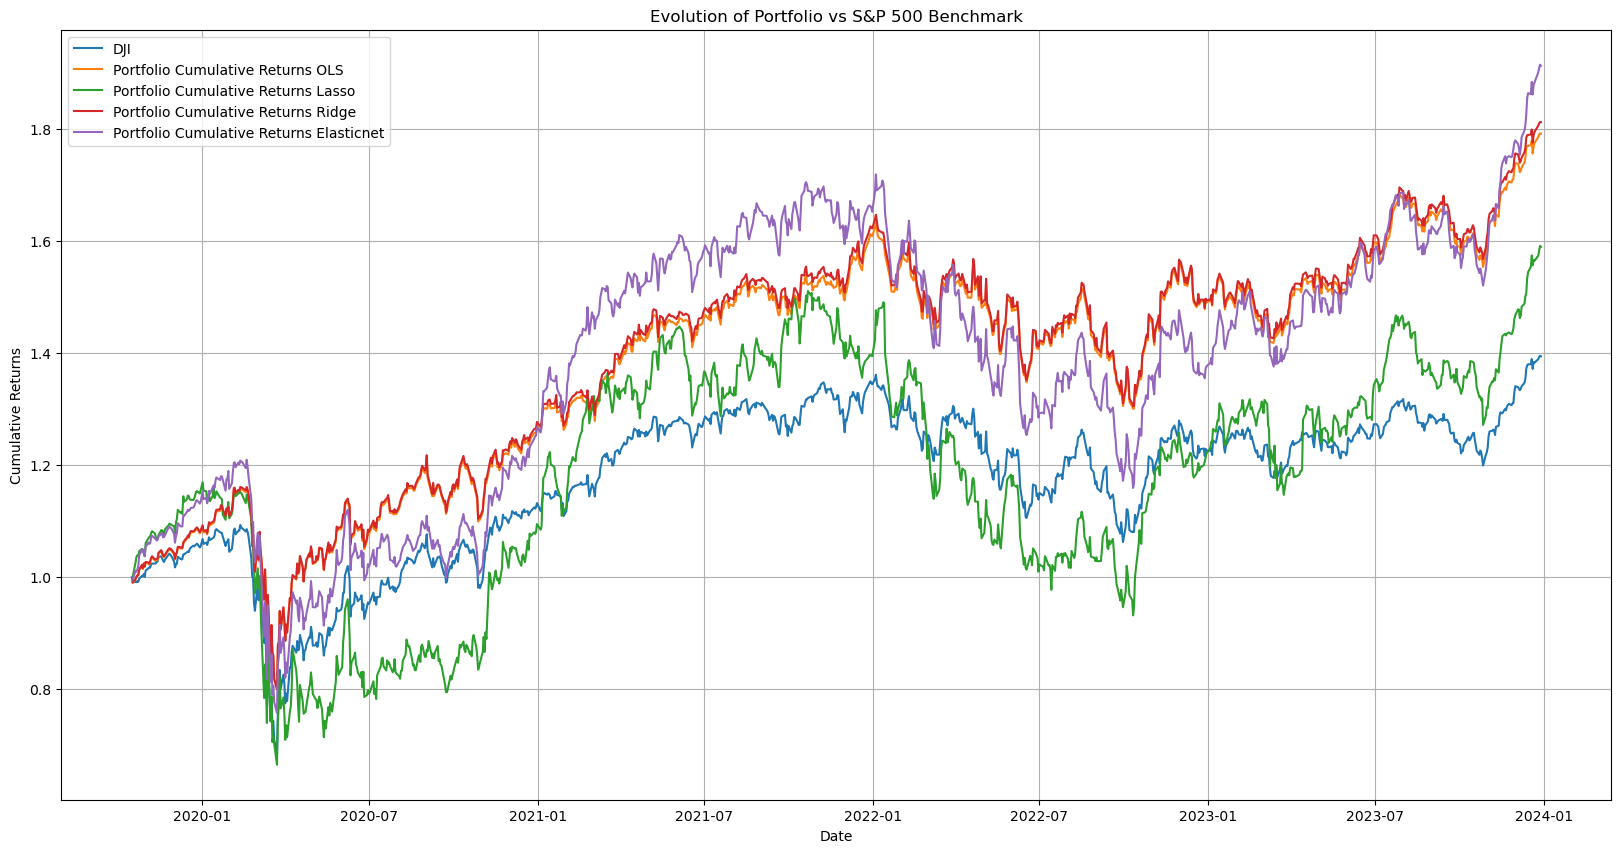

In [57]:
plt.figure(figsize=(20, 10))
plt.plot(results_df['DJI'], label='DJI')
plt.plot(results_df['Portfolio Cumulative Returns OLS'], label='Portfolio Cumulative Returns OLS')
plt.plot(results_df['Portfolio Cumulative Returns Lasso'], label='Portfolio Cumulative Returns Lasso')
plt.plot(results_df['Portfolio Cumulative Returns Ridge'], label='Portfolio Cumulative Returns Ridge')
plt.plot(results_df['Portfolio Cumulative Returns Elasticnet'], label='Portfolio Cumulative Returns Elasticnet')


plt.title('Evolution of Portfolio vs S&P 500 Benchmark')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

In [58]:
evaluation_results

{'MSE': 1.2821796130979876e-05, 'R2': 0.9334409461383031}

In [59]:
results_df['DJI'].mean()

1.1756826754777823

In [60]:
results_df['Portfolio Cumulative Returns OLS'].mean()

1.3841201666784635